In [246]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.feature_extraction.text as sk_text

In [247]:
# Loading Data set
df=pd.read_csv('Datafiniti_Hotel_Reviews.csv')

In [248]:
df.shape

(10000, 25)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
id                      10000 non-null object
dateAdded               10000 non-null object
dateUpdated             10000 non-null object
address                 10000 non-null object
categories              10000 non-null object
primaryCategories       10000 non-null object
city                    10000 non-null object
country                 10000 non-null object
keys                    10000 non-null object
latitude                10000 non-null float64
longitude               10000 non-null float64
name                    10000 non-null object
postalCode              10000 non-null object
province                10000 non-null object
reviews.date            10000 non-null object
reviews.dateSeen        10000 non-null object
reviews.rating          10000 non-null float64
reviews.sourceURLs      10000 non-null object
reviews.text            9999 non-null object
reviews.title   

In [250]:
df.describe()

,latitude,longitude,reviews.rating
count,10000.000000,10000.000000,10000.000000
mean,37.003630,-92.675934,4.034265
std,5.517273,19.347989,1.162240
min,19.438604,-159.474930,1.000000
25%,33.927588,-111.622343,3.350000
50%,37.785060,-84.452114,4.000000
75%,40.416380,-77.052700,5.000000
max,70.133620,-68.203990,5.000000


In [251]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [252]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

In [253]:
reviews = df[['reviews.text','primaryCategories']]
reviews

,reviews.text,primaryCategories
0,Our experience at Rancho Valencia was absolute...,Accommodation & Food Services
1,Amazing place. Everyone was extremely warm and...,Accommodation & Food Services
2,We booked a 3 night stay at Rancho Valencia to...,Accommodation & Food Services
3,Currently in bed writing this for the past hr ...,Accommodation & Food Services
4,I live in Md and the Aloft is my Home away fro...,Accommodation & Food Services
...,...,...
9995,It is hard for me to review an oceanfront hote...,Accommodation & Food Services
9996,"I live close by, and needed to stay somewhere ...",Accommodation & Food Services
9997,Rolled in 11:30 laid out heads down woke up to...,Accommodation & Food Services
9998,Absolutely terrible..I was told I was being gi...,Accommodation & Food Services


In [254]:
reviews.shape

(10000, 2)

In [255]:
reviews.isna().sum()

reviews.text         1
primaryCategories    0
dtype: int64

In [256]:
reviews.dropna(axis = 0, inplace = True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [257]:
reviews.shape

(9999, 2)

In [258]:
reviews.isna().sum()

reviews.text         0
primaryCategories    0
dtype: int64

In [259]:
reviews.head()

,reviews.text,primaryCategories
0,Our experience at Rancho Valencia was absolute...,Accommodation & Food Services
1,Amazing place. Everyone was extremely warm and...,Accommodation & Food Services
2,We booked a 3 night stay at Rancho Valencia to...,Accommodation & Food Services
3,Currently in bed writing this for the past hr ...,Accommodation & Food Services
4,I live in Md and the Aloft is my Home away fro...,Accommodation & Food Services


In [260]:
texts = reviews['reviews.text']
texts

0       Our experience at Rancho Valencia was absolute...
1       Amazing place. Everyone was extremely warm and...
2       We booked a 3 night stay at Rancho Valencia to...
3       Currently in bed writing this for the past hr ...
4       I live in Md and the Aloft is my Home away fro...
                              ...                        
9995    It is hard for me to review an oceanfront hote...
9996    I live close by, and needed to stay somewhere ...
9997    Rolled in 11:30 laid out heads down woke up to...
9998    Absolutely terrible..I was told I was being gi...
9999    Filthy, outdated, noisy neighbours, but this w...
Name: reviews.text, Length: 9999, dtype: object

In [261]:
target = df['primaryCategories']
target

0       Accommodation & Food Services
1       Accommodation & Food Services
2       Accommodation & Food Services
3       Accommodation & Food Services
4       Accommodation & Food Services
                    ...              
9995    Accommodation & Food Services
9996    Accommodation & Food Services
9997    Accommodation & Food Services
9998    Accommodation & Food Services
9999    Accommodation & Food Services
Name: primaryCategories, Length: 10000, dtype: object

In [262]:
lb = LabelEncoder()
y = lb.fit_transform(target)
dummy_y_train = np_utils.to_categorical(y)

In [263]:
dummy_y_train = dummy_y_train[:3000]

In [264]:
import nltk

In [265]:
texts.isna().sum()

0

In [266]:
corpus=[None] * 5000
for i in range(0, 5000):
    corpus[i] = nltk.sent_tokenize(texts[i])
corpus

[['Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!!',
  'We felt special and very happy during our stayed.',
  'I would come back in a heart beat!!',
  '!'],
 ['Amazing place.',
  'Everyone was extremely warm and welcoming.',
  "We've stayed at some top notch places and this is definitely in our top 2.",
  'Great for a romantic getaway or take the kids along as we did.',
  'Had a couple stuffed animals waiting for our girls upon arrival.',
  "Can't wait to go back."],
 ['We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America.',
  'This place is really over the top from a luxury standpoint and overall experience.',
  'The villas are really perfect, the staff is great, attention to details (includes fresh squeezed orange juice each morning), restaurants, bar and room service amazing, and the tennis program was really impressive as well.',
  'We will want to come back here again.'],


In [267]:
len(corpus )

5000

In [268]:
[x for x in corpus if x is not None]

[['Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!!',
  'We felt special and very happy during our stayed.',
  'I would come back in a heart beat!!',
  '!'],
 ['Amazing place.',
  'Everyone was extremely warm and welcoming.',
  "We've stayed at some top notch places and this is definitely in our top 2.",
  'Great for a romantic getaway or take the kids along as we did.',
  'Had a couple stuffed animals waiting for our girls upon arrival.',
  "Can't wait to go back."],
 ['We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America.',
  'This place is really over the top from a luxury standpoint and overall experience.',
  'The villas are really perfect, the staff is great, attention to details (includes fresh squeezed orange juice each morning), restaurants, bar and room service amazing, and the tennis program was really impressive as well.',
  'We will want to come back here again.'],


In [269]:
len(corpus)

5000

In [270]:
for i in range(len(corpus )):
    corpus[i] = [x.lower() for x in corpus[i]]
    corpus[i] = re.sub(r'\W+|\d+|\s+|_', ' ', str(corpus[i]))

In [271]:
corpus

[' our experience at rancho valencia was absolutely perfect from beginning to end we felt special and very happy during our stayed i would come back in a heart beat ',
 ' amazing place everyone was extremely warm and welcoming we ve stayed at some top notch places and this is definitely in our top   great for a romantic getaway or take the kids along as we did had a couple stuffed animals waiting for our girls upon arrival can t wait to go back ',
 ' we booked a   night stay at rancho valencia to play some tennis since it is one of the highest rated tennis resorts in america this place is really over the top from a luxury standpoint and overall experience the villas are really perfect the staff is great attention to details includes fresh squeezed orange juice each morning restaurants bar and room service amazing and the tennis program was really impressive as well we will want to come back here again ',
 ' currently in bed writing this for the past hr     there have been dogs barking 

In [272]:
len(corpus)

5000

# Extracting keywords
Here I use the TfidfVectorizer since I'm hoping the IDF score will pull out unique words that I can use in clustering. There are lots of options to explore here to get different results, including CountVectorizer

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [274]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)

In [275]:
tfidf.fit(corpus)
text = tfidf.transform(corpus)

In [276]:
text.shape

(5000, 3000)

In [277]:
text_train = text[:3000]
text_test = text[3000:]

In [278]:
text_test.shape

(2000, 3000)

In [279]:
text_train.shape

(3000, 3000)

# Neural Network Model

In [280]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D

def build_model():
    model = Sequential()
    model.add(Dense(256, input_dim=3000, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(160, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [281]:
estimator = KerasClassifier(build_fn=build_model, epochs=15, batch_size=128)
training = estimator.fit(text_train, dummy_y_train)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 256)               768256    
_________________________________________________________________
dropout_60 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 200)               51400     
_________________________________________________________________
dropout_61 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 160)               32160     
_________________________________________________________________
dropout_62 (Dropout)         (None, 160)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 120)             

In [282]:
y_test = estimator.predict(text_test)

In [283]:
y_pred = lb.inverse_transform(y_test)

In [284]:
y_pred

array(['Accommodation & Food Services', 'Accommodation & Food Services',
       'Accommodation & Food Services', ...,
       'Accommodation & Food Services', 'Accommodation & Food Services',
       'Accommodation & Food Services'], dtype=object)

In [285]:
acc = np.mean(training.history['accuracy'])

In [286]:
acc

0.9858887

In [287]:
print("\n%s: %.2f%%" % ('Accuracy of the model', acc*100))


Accuracy of the model: 98.59%


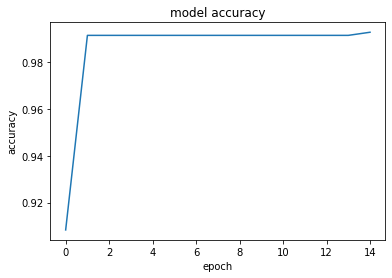

In [288]:
plt.plot(training.history['accuracy'])
# plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Finding Optimal Clusters
Clustering is an unsupervised operation, and KMeans requires that we specify the number of clusters. One simple approach is to plot the SSE for a range of cluster sizes. We look for the "elbow" where the SSE begins to level off. MiniBatchKMeans introduces some noise so I raised the batch and init sizes higher. Unfortunately the regular Kmeans implementation is too slow. You'll notice different random states will generate different charts. Here I chose 14 clusters.

In [289]:
from sklearn.cluster import MiniBatchKMeans

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


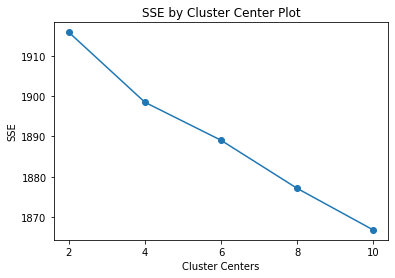

In [290]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text_test, 10)

In [291]:
clusters_test = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=20).fit_predict(text_test)

In [292]:
clusters_train = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=20).fit_predict(text_train)

In [293]:
clusters_test

array([5, 6, 8, ..., 3, 4, 1])

# Plotting Clusters
Here we plot the clusters generated by our KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. 

In [294]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

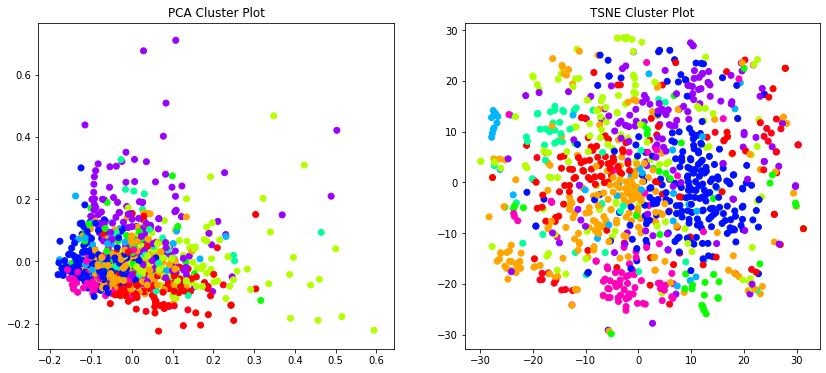

In [295]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(2000), size=1000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=1000, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text_test, clusters_test)

# Top Keywords
Lastly, we'll cycle through the clusters and print out the top keywords based on their TFIDF score to see if we can spot any trends. I'll do this by computing an average value across all dimensions in Pandas, grouped by the cluster label. Using numpy, finding the top words is simply sorting the average values for each row, and taking the top N.


In [296]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text_test, clusters_test, tfidf.get_feature_names(), 10)


Cluster 0
comfortable,area,clean,wonderful,enjoyed,definitely,pleasant,staff,hotel,stay

Cluster 1
area,nice,breakfast,stayed,friendly,service,shuttle,staff,metro,hotel

Cluster 2
room,nice,friendly,breakfast,clean,location,stay,hotel,staff,great

Cluster 3
location,expensive,breakfast,good,hotel,valet,free,room,lot,parking

Cluster 4
helpful,room,great,clean,breakfast,location,hotel,staff,service,excellent

Cluster 5
nice,hotel,people,clean,broken,room,rooms,highway,noise,noisy

Cluster 6
bad,didn,bed,like,clean,check,hotel,did,desk,room

Cluster 7
comfortable,hotel,room,friendly,clean,staff,bad,nice,breakfast,good

Cluster 8
kitchen,pools,kids,honua,kai,bedroom,stayed,pool,beach,resort

Cluster 9
clean,bwi,place,restaurants,stay,shuttle,hotel,nice,close,airport


In [297]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [299]:
from sklearn.cluster import KMeans

[0.01019371 0.01028044 0.01028804 0.01032879 0.01036831 0.01039153
 0.01040236 0.01043406 0.01046559 0.01053649 0.01054005 0.01056056
 0.01061689 0.01064257 0.01066331 0.01066339 0.01067204 0.01070062
 0.01073365 0.01082806 0.01084388 0.01086144 0.01089614 0.01090753
 0.01093379 0.01099617 0.0109971  0.01104645 0.01104976 0.01108574
 0.01108713 0.01109689 0.01113762 0.01115115 0.01116762 0.01117881
 0.01120952 0.01121304 0.01121966 0.01122579 0.01122658 0.01124331
 0.01127111 0.01131103 0.01131189 0.0113132  0.01131397 0.01132097
 0.01132426 0.01135437 0.01135611 0.01136957 0.01139357 0.01139894
 0.0114404  0.0114496  0.01149192 0.01153211 0.01154417 0.01155591
 0.01157782 0.01158887 0.0115914  0.01159697 0.0115999  0.01161879
 0.01165433 0.0116597  0.01166285 0.01166521 0.01168452 0.01169295
 0.01172448 0.01182204 0.0118776  0.0119146  0.01193679 0.01194773
 0.01197441 0.01199074 0.0120414  0.01208661 0.01209176 0.01210921
 0.0121133  0.01212502 0.01213067 0.01215834 0.01216433 0.0121

[-2.74374427e-03 -1.74148292e-03 -7.97008167e-04  7.56151748e-05
  4.31185350e-04  5.16821979e-04  5.99578797e-04  7.37506809e-04
  9.95746337e-04  9.98882252e-04  1.22071049e-03  1.35467794e-03
  1.41535411e-03  1.75998959e-03  2.04266915e-03  2.09154170e-03
  2.16527637e-03  2.17115752e-03  2.24952808e-03  2.60338753e-03
  2.64286315e-03  2.69080162e-03  2.73023591e-03  3.38169453e-03
  3.38392085e-03  3.79780846e-03  4.24854551e-03  4.49465889e-03
  5.00439528e-03  5.16125689e-03  5.17372402e-03  5.20004722e-03
  5.29232166e-03  5.37059048e-03  5.42674673e-03  5.45821347e-03
  5.65208730e-03  5.79013117e-03  5.86261435e-03  5.88668529e-03
  5.92517932e-03  5.97796851e-03  6.04723126e-03  6.47514075e-03
  6.53885405e-03  6.88068215e-03  6.91351655e-03  7.01572762e-03
  7.05035001e-03  7.09014182e-03  7.10858606e-03  7.23053186e-03
  7.25435678e-03  7.32331335e-03  7.47209746e-03  7.56388028e-03
  7.61736201e-03  7.69164960e-03  7.75778525e-03  7.81461216e-03
  8.16748737e-03  8.22203

[-0.00598175 -0.00354314 -0.00348196 -0.00319741 -0.00297026 -0.00276353
 -0.00269842 -0.00224468 -0.00211619 -0.0020895  -0.00205056 -0.00184865
 -0.00179611 -0.00170766 -0.00160557 -0.00133064 -0.00116491 -0.00061244
 -0.0003635  -0.00027995 -0.00019754 -0.00019482  0.00025982  0.00030235
  0.00061909  0.00068764  0.00085608  0.00087328  0.00087507  0.00097254
  0.00123204  0.00131226  0.00138839  0.00147148  0.00153515  0.00156073
  0.00158962  0.00160235  0.00181649  0.0019101   0.0020735   0.00207793
  0.00216549  0.00229382  0.00249745  0.00251374  0.00269748  0.00278052
  0.00280618  0.00284325  0.00286996  0.00306738  0.003072    0.00316993
  0.00328311  0.00332202  0.00337221  0.00354161  0.00354419  0.00360481
  0.00362879  0.00403688  0.00421941  0.00440586  0.00444682  0.00453671
  0.00454257  0.00460777  0.0046311   0.00472041  0.00497461  0.00516042
  0.00519101  0.00528317  0.00552327  0.00578132  0.00584443  0.00590867
  0.00590919  0.00591093  0.00593774  0.0060974   0

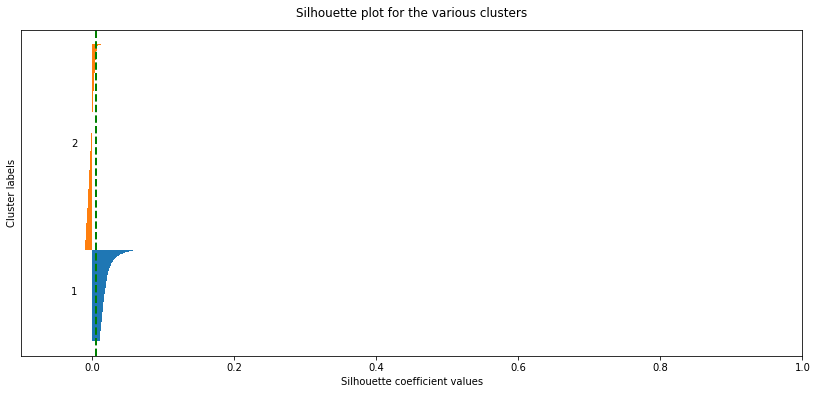

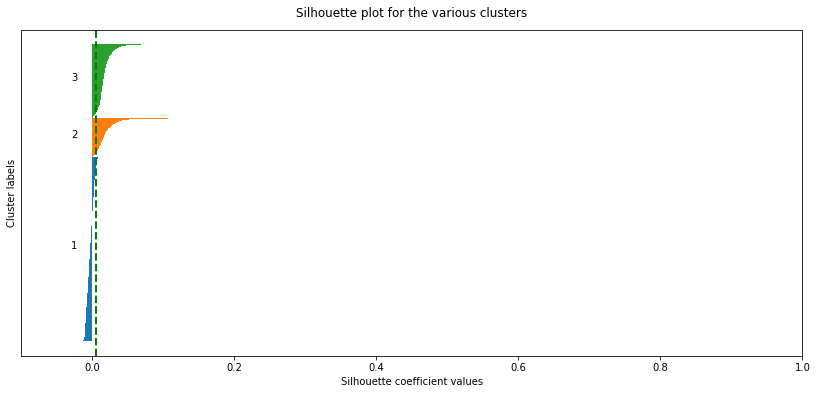

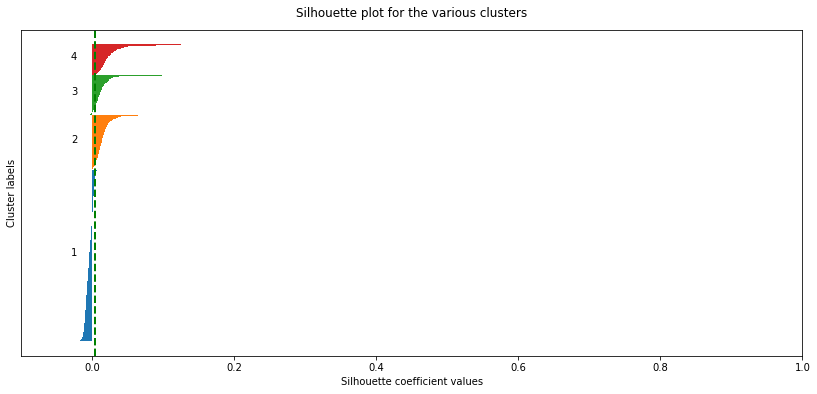

In [300]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1) = plt.subplots(1, figsize=(14, 6))
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(text_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    
    silhouette_vals = silhouette_samples(text_test, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
        print(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
#     ax2.scatter(text[:, 0], text[:, 1], c=labels)
#     ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
#     ax2.set_xlim([-2, 2])
#     ax2.set_xlim([-2, 2])
#     ax2.set_xlabel('Eruption time in mins')
#     ax2.set_ylabel('Waiting time to next eruption')
#     ax2.set_title('Visualization of clustered data', y=1.02)
#     ax2.set_aspect('equal')
#     plt.tight_layout()
#     plt.suptitle(f'Silhouette analysis using k = {k}',
#                  fontsize=16, fontweight='semibold', y=1.05);

In [321]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D


model = Sequential()
model.add(Dense(64,input_shape=(2397,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                153472    
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_22 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
activation_23 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

In [320]:
text_train.shape

(3000, 2397)

In [322]:
model.fit(text_train,clusters_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 6s 2ms/step - loss: -6.7590 - acc: 0.2338 - val_loss: -21.3796 - val_acc: 0.3733.9037 -
Epoch 2/10
2400/2400 [==============================] - 1s 252us/step - loss: -114.9490 - acc: 0.2350 - val_loss: -210.8081 - val_acc: 0.3733
Epoch 3/10
2400/2400 [==============================] - 1s 295us/step - loss: -612.8578 - acc: 0.2350 - val_loss: -860.1180 - val_acc: 0.3733
Epoch 4/10
2400/2400 [==============================] - 1s 253us/step - loss: -1912.3849 - acc: 0.2350 - val_loss: -2280.3492 - val_acc: 0.3733
Epoch 5/10
2400/2400 [==============================] - 1s 213us/step - loss: -4376.2192 - acc: 0.2350 - val_loss: -4743.1540 - val_acc: 0.3733
Epoch 6/10
2400/2400 [==============================] - 1s 213us/step - loss: -8355.9028 - acc: 0.2350 - val_loss: -8490.8060 - val_acc: 0.3733
Epoch 7/10
2400/2400 [==============================] - 1s 217us/step - loss: -14185.0282 - a

In [294]:
y_predict = model.predict(text_test)

In [295]:
y_predict

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [297]:
k_predict = km.predict(text_test)

In [300]:
k_predict = np.reshape(k_predict, (-1, 1))

In [301]:
k_predict

array([[0],
       [0],
       [0],
       ...,
       [3],
       [0],
       [0]])

In [323]:
clusters_test

array([5, 5, 5, ..., 3, 4, 6])

In [ ]:
plot_tsne_pca(text_train, clusters_test)

[-0.01300353 -0.01284066 -0.01280721 ...  0.01458426  0.01484798
  0.01618566]
[0.0124559  0.0126389  0.01268449 ... 0.11329066 0.11761836 0.11761836]
[-0.01674855 -0.01659011 -0.0165261  ...  0.00893787  0.00963707
  0.01091217]
[-0.0099299  -0.00991811 -0.00951186 ...  0.03342803  0.0338053
  0.04136274]
[0.00927415 0.00947926 0.00956142 0.00960792 0.0096207  0.00966853
 0.00967399 0.00969989 0.00995617 0.00996983 0.01004522 0.01008136
 0.01013321 0.01014623 0.01019514 0.01023263 0.010253   0.01029367
 0.01033385 0.01036511 0.01044419 0.01049534 0.01057304 0.0106021
 0.01069449 0.01073253 0.01076844 0.01081613 0.01082737 0.01083376
 0.01093748 0.01096683 0.01102681 0.01106731 0.01110717 0.01124186
 0.01130873 0.01137091 0.01137528 0.01142854 0.01147005 0.01161233
 0.01163383 0.01177864 0.01181356 0.01185649 0.01186103 0.01193679
 0.01196667 0.01197825 0.01201696 0.01202643 0.01208414 0.01208983
 0.01210247 0.01211159 0.01214748 0.0122613  0.01229233 0.01231841
 0.01232761 0.01237001 

[-0.01732532 -0.01721644 -0.01720655 ...  0.00558859  0.00644034
  0.00644052]
[-0.00798141 -0.00795132 -0.00793084 ...  0.03857144  0.03877457
  0.03957309]
[0.00569741 0.00670265 0.00700957 0.00726902 0.0073585  0.00737751
 0.007601   0.00798842 0.00808214 0.00824749 0.00825542 0.00829274
 0.00836465 0.00837792 0.00843708 0.00854403 0.00871701 0.00879844
 0.00882995 0.00886028 0.00900719 0.00902951 0.00912599 0.00914642
 0.00919962 0.0092362  0.0092977  0.00929849 0.00930741 0.0093881
 0.00941555 0.00947602 0.00950351 0.00953548 0.00958795 0.00960192
 0.00963183 0.00964964 0.00970506 0.00980864 0.00985239 0.00986135
 0.00991709 0.00991979 0.01001501 0.01013114 0.01016224 0.01020647
 0.01029321 0.01044662 0.01053567 0.01059431 0.01060123 0.01060957
 0.01063051 0.01064079 0.01077722 0.01077755 0.01079547 0.01099533
 0.01102867 0.0110332  0.01106406 0.0110986  0.01111045 0.01114718
 0.0111543  0.01117552 0.01119817 0.01128259 0.01131895 0.01139609
 0.01144494 0.01152199 0.01152672 0.011

[-0.00227008 -0.00049599  0.00281713  0.00429581  0.00467183  0.00471367
  0.00473909  0.00474305  0.00484447  0.00500236  0.00500311  0.00509774
  0.00510457  0.00554625  0.0057262   0.00588821  0.00590101  0.00607473
  0.0060956   0.00625838  0.00626604  0.00633591  0.00641961  0.00644883
  0.00663015  0.00675308  0.00681784  0.00682866  0.00689649  0.00690713
  0.00690868  0.00698442  0.00699747  0.007034    0.00715213  0.00716684
  0.00725899  0.00733226  0.00746323  0.0075884   0.00760181  0.00762874
  0.00777568  0.00788237  0.00802092  0.00836722  0.00837398  0.00843968
  0.00849492  0.00855433  0.00857486  0.00858188  0.00881643  0.00881964
  0.00909284  0.00925798  0.00934873  0.00936267  0.00938495  0.00951309
  0.0095676   0.00970128  0.00971194  0.00975156  0.00980018  0.00980656
  0.00993587  0.0099732   0.01006602  0.01007702  0.01016178  0.01017087
  0.01019761  0.01022321  0.01025193  0.01026029  0.01037682  0.01044286
  0.01047095  0.01052415  0.01052917  0.01069396  0

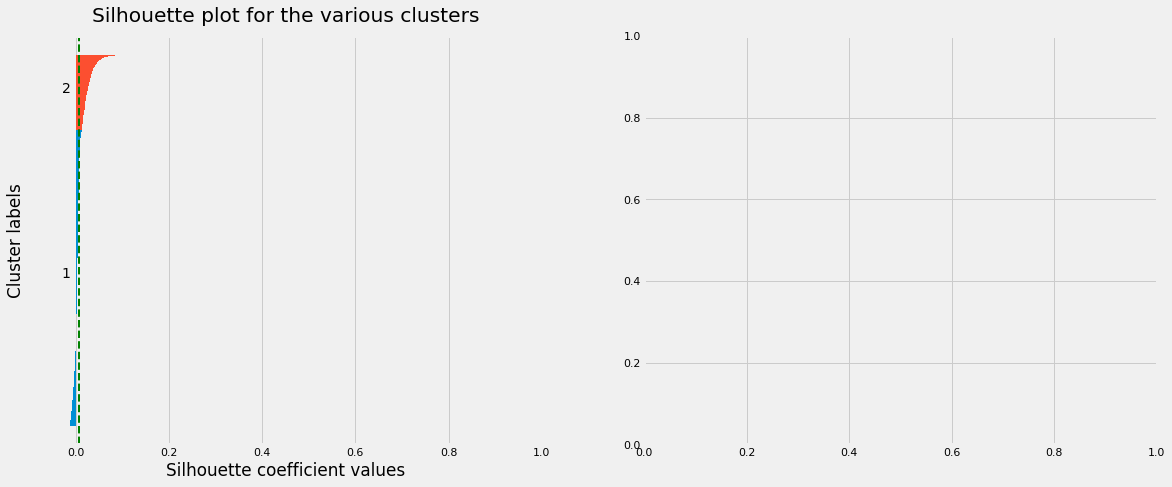

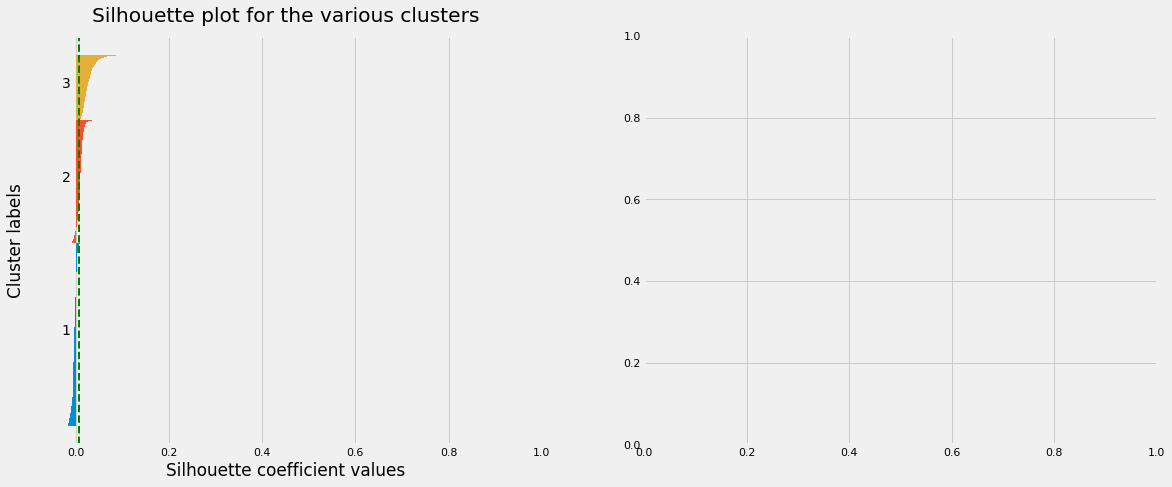

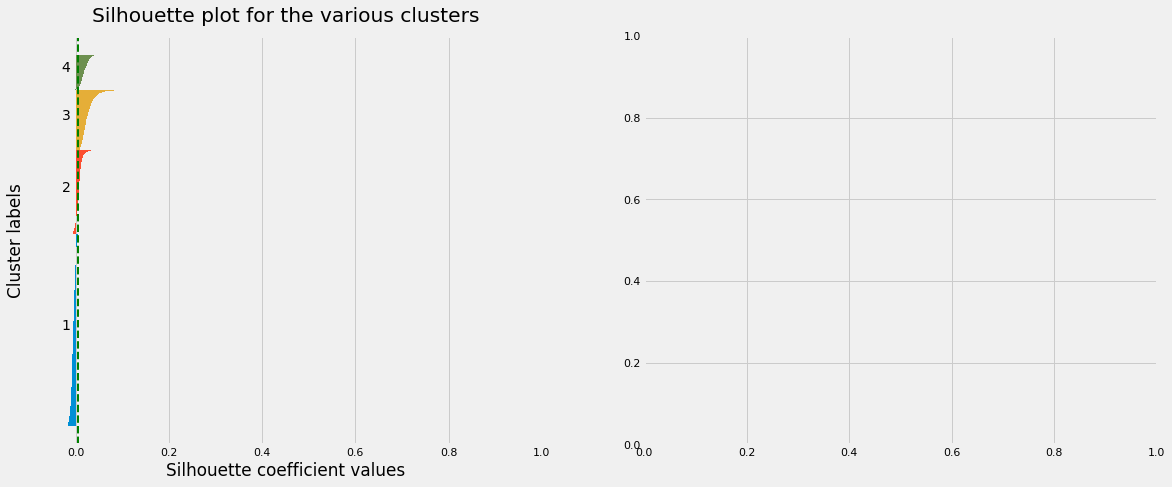

In [162]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1) = plt.subplots(1, figsize=(14, 6))
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
#     labels = km.fit_predict(text_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    
    silhouette_vals = silhouette_samples(text_test, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)
        print(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
#     ax2.scatter(text[:, 0], text[:, 1], c=labels)
#     ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
#     ax2.set_xlim([-2, 2])
#     ax2.set_xlim([-2, 2])
#     ax2.set_xlabel('Eruption time in mins')
#     ax2.set_ylabel('Waiting time to next eruption')
#     ax2.set_title('Visualization of clustered data', y=1.02)
#     ax2.set_aspect('equal')
#     plt.tight_layout()
#     plt.suptitle(f'Silhouette analysis using k = {k}',
#                  fontsize=16, fontweight='semibold', y=1.05);

In [127]:
Tfidf_vectorizer = sk_text.TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1), min_df = .05 , max_df = .85)

In [129]:
matrix = Tfidf_vectorizer.fit_transform(corpus)

In [78]:
tfidf_data = matrix.toarray()

In [79]:
tfidf_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.26356318, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.33579681, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18223932, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [80]:
print(Tfidf_vectorizer.get_feature_names())

['area', 'bad', 'bar', 'bathroom', 'bed', 'beds', 'best', 'breakfast', 'check', 'clean', 'close', 'comfortable', 'day', 'definitely', 'desk', 'did', 'didn', 'enjoyed', 'excellent', 'experience', 'family', 'floor', 'food', 'free', 'friendly', 'good', 'got', 'great', 'helpful', 'hotel', 'hotels', 'just', 'like', 'little', 'location', 'loved', 'new', 'nice', 'night', 'parking', 'people', 'perfect', 'place', 'pool', 'price', 'really', 'recommend', 'restaurant', 'restaurants', 'right', 'room', 'rooms', 'service', 'small', 'staff', 'stay', 'stayed', 'staying', 'thank', 'time', 'trip', 'view', 'walk', 'walking', 'way', 'wonderful']


In [82]:
from sklearn.model_selection import train_test_split

In [84]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(final_input_features, df_clean1['stars'], test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
print ("WordLevel TF-IDF: ")
    x_tfidf = matrix

In [ ]:
def wordtfidf(text):
    # word level tf-idf
    tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
    tfidf_vect.fit(text)
    text_tfidf =  tfidf_vect.transform(text)
    return text_tfidf

In [ ]:
evalsdf['mean_tfidf'], evalsdf['std_tfidf'], df['preds_1'] = k_means(x_tfidf, y, 2, repeat = r)

In [ ]:
def k_means(x, y, k, repeat = 1):
    arr_a = list()
    arr_b = list()
    arr_c = list()
    arr_f = list()
    arr_g = list()
    arr_h = list()
    arr_i = list()
    arr_j = list()
    for i in range(repeat):
        km = KMeans(n_clusters=k)
        kmeans = km.fit(x)
        predictions = kmeans.labels_
        a = metrics.accuracy_score(predictions, y)
        b = metrics.silhouette_score(x, predictions)
        c = metrics.adjusted_rand_score(y, predictions)
        f = metrics.silhouette_score(x, y)
        g = metrics.adjusted_mutual_info_score(y, predictions, average_method='arithmetic')
        h = metrics.normalized_mutual_info_score(y, predictions, average_method='arithmetic')
        i = metrics.homogeneity_score(y, predictions)
        j = metrics.completeness_score(y, predictions)
        arr_a.append(a)
        arr_b.append(b)
        arr_c.append(c)
        arr_f.append(f)
        arr_g.append(g)
        arr_h.append(h)
        arr_i.append(i)
        arr_j.append(j)
    print(kmeans.cluster_centers_)        
    print("accuracy: \t", np.mean(arr_a), "std: ", np.std(arr_a))
    print("ASW: \t\t", np.mean(arr_b), "std: ", np.std(arr_b))
    print("ARI: \t\t", np.mean(arr_c), "std: ", np.std(arr_c))
    print("true ASW: \t", np.mean(arr_f), "std: ", np.std(arr_f))
    print("AMI: \t\t", np.mean(arr_g), "std: ", np.std(arr_g))
    print("NMI: \t\t", np.mean(arr_h), "std: ", np.std(arr_h))
    print("H: \t\t", np.mean(arr_i), "std: ", np.std(arr_i))
    print("C: \t\t", np.mean(arr_j), "std: ", np.std(arr_j))
    means = [np.mean(arr_a), np.mean(arr_b), np.mean(arr_c), np.mean(arr_f), np.mean(arr_g), np.mean(arr_h), np.mean(arr_i), np.mean(arr_j)]
    stds = [np.std(arr_a), np.std(arr_b), np.std(arr_c), np.std(arr_f), np.std(arr_g), np.std(arr_h), np.std(arr_i), np.std(arr_j)]
    return means, stds, predictions

In [85]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [86]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [88]:
import numpy as np
from numpy.linalg import norm

In [89]:
class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

In [90]:
km = Kmeans(n_clusters=2, max_iter=100)